In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn import metrics
import seaborn as sns
from statsmodels.graphics.regressionplots import *
import statsmodels.api as sm
from statsmodels.formula.api import ols

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("paper")
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score,mean_absolute_error,
                             mean_squared_error,explained_variance_score,r2_score,
                            confusion_matrix,precision_score, recall_score, f1_score)
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils

In [3]:
atlas = pd.read_csv('/Users/rishigummakonda/Documents/Springboard/capstone/data/atlas_data/atlas.csv')
atlas.fillna(0,inplace=True)

'czname' represents of the name of the commuting zone. A commuting zone represents a geographical area that shares a common market. When analyzing a social mobility in NYC and LA, it is more accurate to look at all areas that share a market rather than just areas within the city. 

In [43]:
nyc_atlas=atlas[atlas['czname']=='New York']
la_atlas=atlas[atlas['czname']=='Los Angeles']
nyc_atlas.reset_index(drop=True, inplace=True)
la_atlas.reset_index(drop=True,inplace=True)

The list below contains the name of rows which do not effect the measures of upward mobility. 

In [5]:
characteristics=['tract','county','state','cz','czname','mergecounts',
                 'kfr_natam_p25','kfr_natam_p75','kfr_natam_p100',
                 'kfr_asian_p25','kfr_asian_p75','kfr_asian_p100',
                 'kfr_black_p25','kfr_black_p75','kfr_black_p100',
                 'kfr_white_p25','kfr_white_p75','kfr_white_p100',
                 'kfr_hisp_p25','kfr_hisp_p75','kfr_hisp_p100',
                   'count_black','count_pooled','count_white','count_asian','count_hisp','count_natam']

In [6]:
nyc_cleaned= nyc_atlas.drop(characteristics,axis=1)
nyc_cleaned.fillna(0, inplace=True)

la_cleaned= la_atlas.drop(characteristics,axis=1)
la_cleaned.fillna(0, inplace=True)

Above, two new datasets are created without the columns that do not effect the measures of social mobility.

Below, the LinearRegressionModel class creates a train and test set, creates a model that is fitted to the training data (X_train and y_train) then outputs predictions based upon the X_test set. The function print_metrics() outputs relevant metrics to evaluate the model.

In [7]:
class LinearRegressionModel(object):
    def __init__(self, x, y):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(x, y, test_size = .3, random_state=42)
    def get_model(self):
        return LinearRegression(fit_intercept=False)
    def get_pred(self):
        model = self.get_model()
        model.fit(self.X_train,self.y_train)
        predictions = model.predict(self.X_test)
        return predictions
    def print_metrics(self):
        actual = list(self.y_test)
        predicted = list(self.get_pred())
        print('MAE:', mean_absolute_error(actual, predicted))
        print('MSE:', mean_squared_error(actual, predicted))
        print('Explained Variance Score:', explained_variance_score(actual, predicted))
        print('R2 Score:', r2_score(actual, predicted))

Regression Analysis for children that start in the 75th percentile of income in NYC and LA.

In [8]:
nyc_p75_y= nyc_cleaned['kfr_pooled_p75']
nyc_p75_x= nyc_cleaned.drop(['kfr_pooled_p100','kfr_pooled_p25','kfr_pooled_p75'],axis=1)

In [9]:
lr_nyc75 = LinearRegressionModel(nyc_p75_x,nyc_p75_y)

In [10]:
lr_nyc75.print_metrics()

MAE: 5268.260777598514
MSE: 55537717.98334336
Explained Variance Score: 0.7625944469304642
R2 Score: 0.762525152785114


In [11]:
la_p75_y= la_cleaned['kfr_pooled_p75']
la_p75_x= la_cleaned.drop(['kfr_pooled_p100','kfr_pooled_p25','kfr_pooled_p75'],axis=1)

In [12]:
lr_la75 = LinearRegressionModel(la_p75_x,la_p75_y)

In [13]:
lr_la75.print_metrics()

MAE: 4272.33647212494
MSE: 46063334.103654735
Explained Variance Score: 0.4322977449717452
R2 Score: 0.43162331555627287


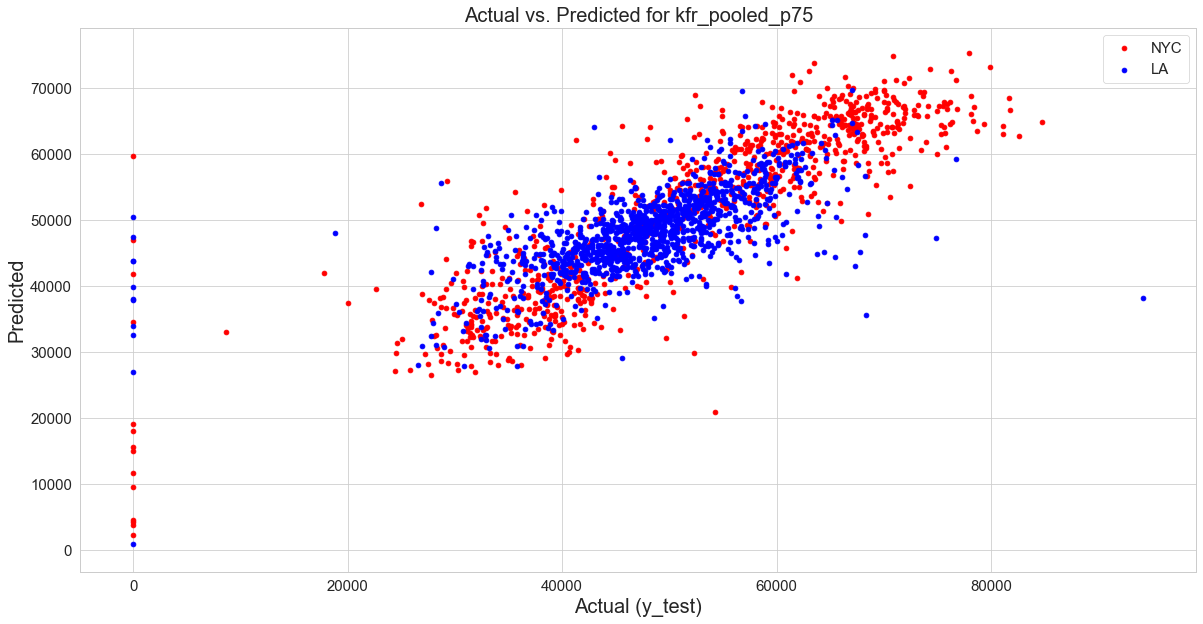

In [14]:
#Plotting Actual vs. Predicted
fig = plt.figure(figsize=(20,10))
plt.scatter(list(lr_nyc75.y_test), lr_nyc75.get_pred(), color='red', label='NYC')
plt.scatter(list(lr_la75.y_test), lr_la75.get_pred(), color='blue', label='LA')
plt.title('Actual vs. Predicted for kfr_pooled_p75', fontsize=20)
plt.xlabel('Actual (y_test)',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

Regression Analysis for children that start in the 25th percentile of income in NYC and LA.

In [15]:
nyc_p25_y= nyc_cleaned['kfr_pooled_p25']
nyc_p25_x= nyc_cleaned.drop(['kfr_pooled_p100','kfr_pooled_p25','kfr_pooled_p75'],axis=1)

In [16]:
lr_nyc25 = LinearRegressionModel(nyc_p25_x,nyc_p25_y)

In [17]:
lr_nyc25.print_metrics()

MAE: 4319.368315582802
MSE: 38561703.33336381
Explained Variance Score: 0.7006096692963326
R2 Score: 0.700446343440607


In [18]:
la_p25_y= la_cleaned['kfr_pooled_p25']
la_p25_x= la_cleaned.drop(['kfr_pooled_p100','kfr_pooled_p25','kfr_pooled_p75'],axis=1)

In [19]:
lr_la25 = LinearRegressionModel(la_p25_x,la_p25_y)

In [20]:
lr_la25.print_metrics()

MAE: 3169.860194077269
MSE: 25806391.0061962
Explained Variance Score: 0.5521873260839516
R2 Score: 0.5517468386513864


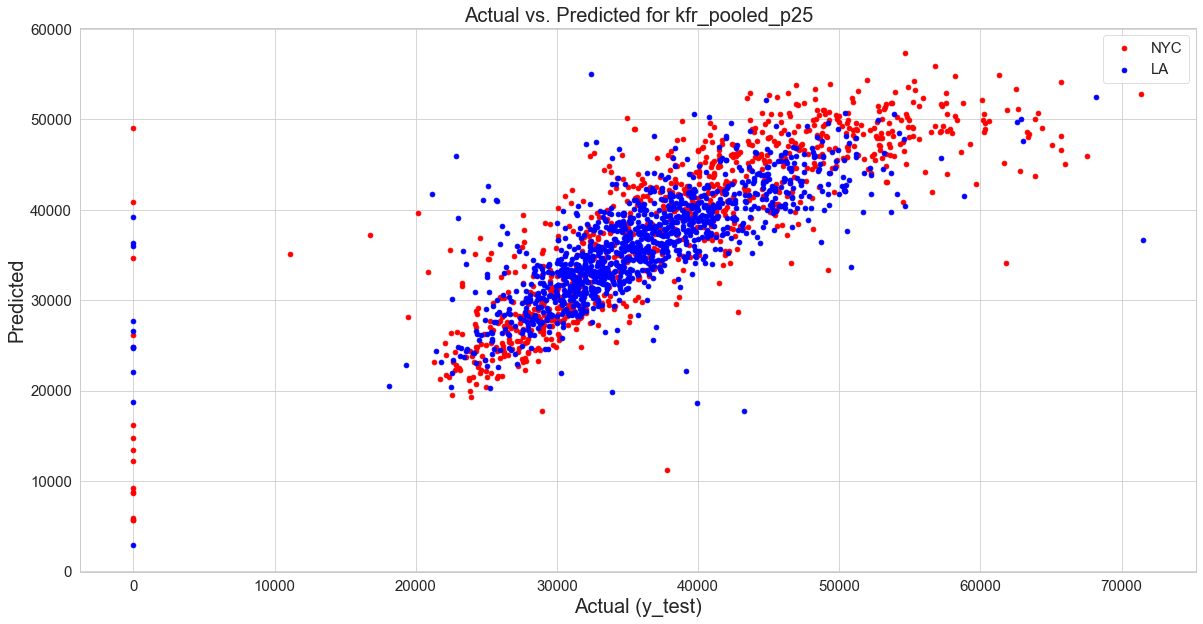

In [21]:
#Plotting Actual vs. Predicted
fig = plt.figure(figsize=(20,10))
plt.scatter(list(lr_nyc25.y_test), lr_nyc25.get_pred(), color='red', label='NYC')
plt.scatter(list(lr_la25.y_test), lr_la25.get_pred(), color='blue', label='LA')
plt.title('Actual vs. Predicted for kfr_pooled_p25', fontsize=20)
plt.xlabel('Actual (y_test)',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

Regression Analysis between kfr_pooled_p75 and kfr_pooled_p25.

In [22]:
nyc_y= nyc_cleaned['kfr_pooled_p75']
nyc_x= nyc_cleaned['kfr_pooled_p25'].values.reshape(-1, 1)
nyc_lr = LinearRegressionModel(nyc_x,nyc_y)
nyc_lr.print_metrics()

MAE: 5494.147331933446
MSE: 51670404.64319773
Explained Variance Score: 0.7802218339293067
R2 Score: 0.7790614758090203


In [23]:
la_y= la_cleaned['kfr_pooled_p75']
la_x= la_cleaned['kfr_pooled_p25'].values.reshape(-1, 1)
la_lr = LinearRegressionModel(la_x,la_y)
la_lr.print_metrics()

MAE: 4904.707014744283
MSE: 43483025.56875612
Explained Variance Score: 0.46798141909046853
R2 Score: 0.46346181006488396


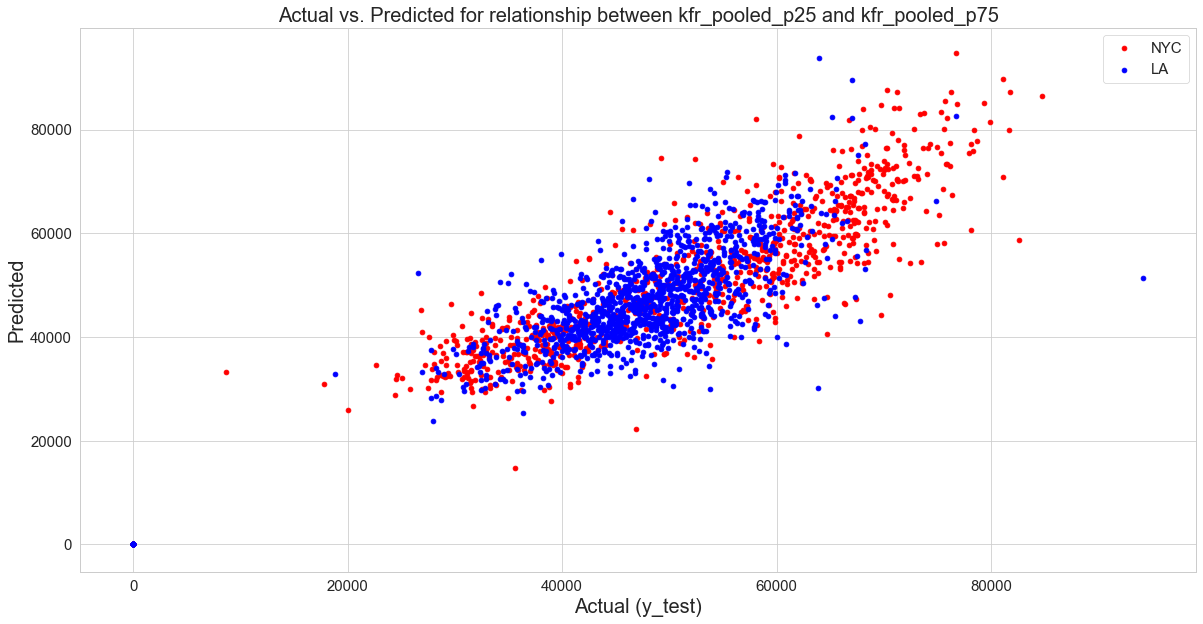

In [24]:
#Plotting Actual vs. Predicted
fig = plt.figure(figsize=(20,10))
plt.scatter(list(nyc_lr.y_test), nyc_lr.get_pred(), color='red', label='NYC')
plt.scatter(list(la_lr.y_test), la_lr.get_pred(), color='blue', label='LA')
plt.title('Actual vs. Predicted for relationship between kfr_pooled_p25 and kfr_pooled_p75', fontsize=20)
plt.xlabel('Actual (y_test)',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

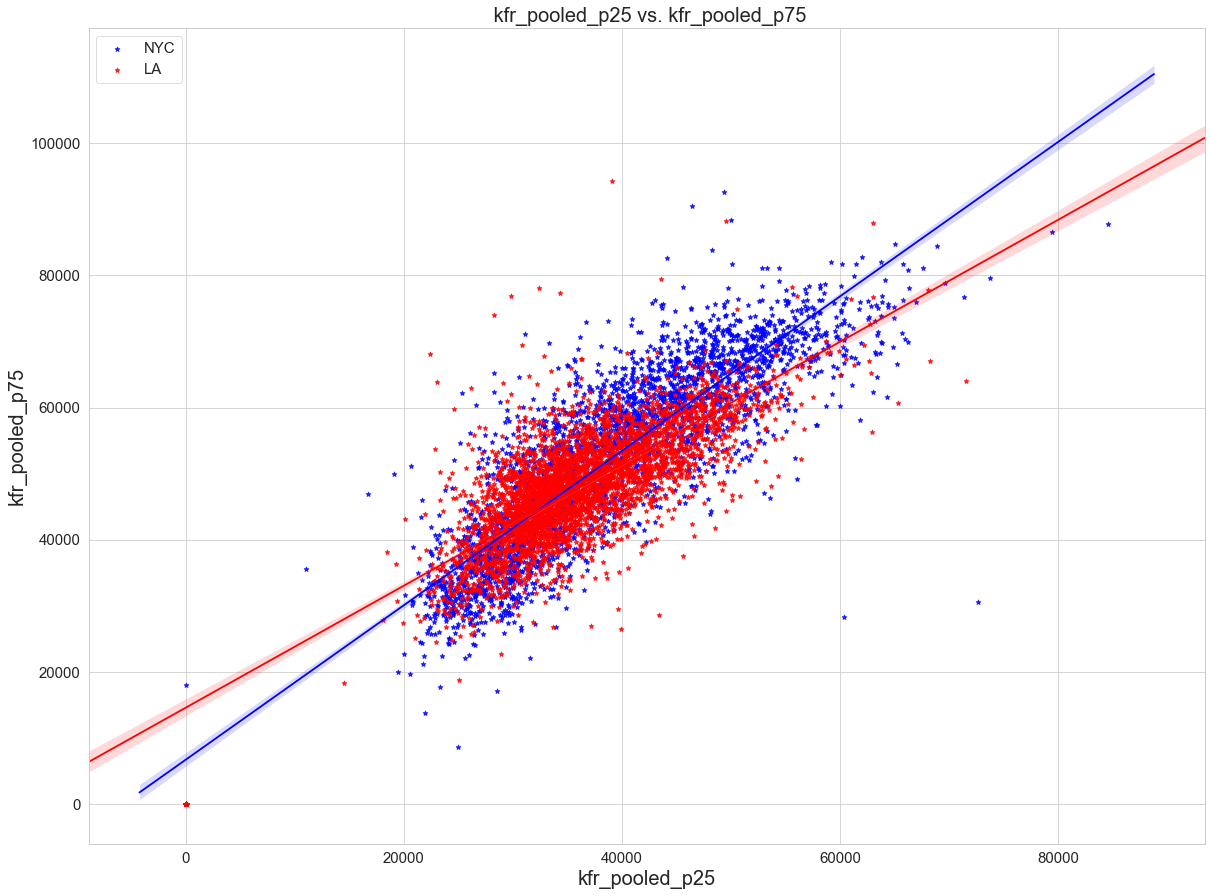

In [40]:
#Plotting kfr_pooled_p25 vs. kfr_pooled_p75
fig = plt.figure(figsize=(20,15))
sns.regplot(x=nyc_x,y=nyc_y,color='blue', marker='*', label='NYC')
sns.regplot(x=la_x,y=la_y,color='red', marker='*',label='LA')
plt.title(' kfr_pooled_p25 vs. kfr_pooled_p75', fontsize=20)
plt.xlabel('kfr_pooled_p25',fontsize=20)
plt.ylabel('kfr_pooled_p75',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

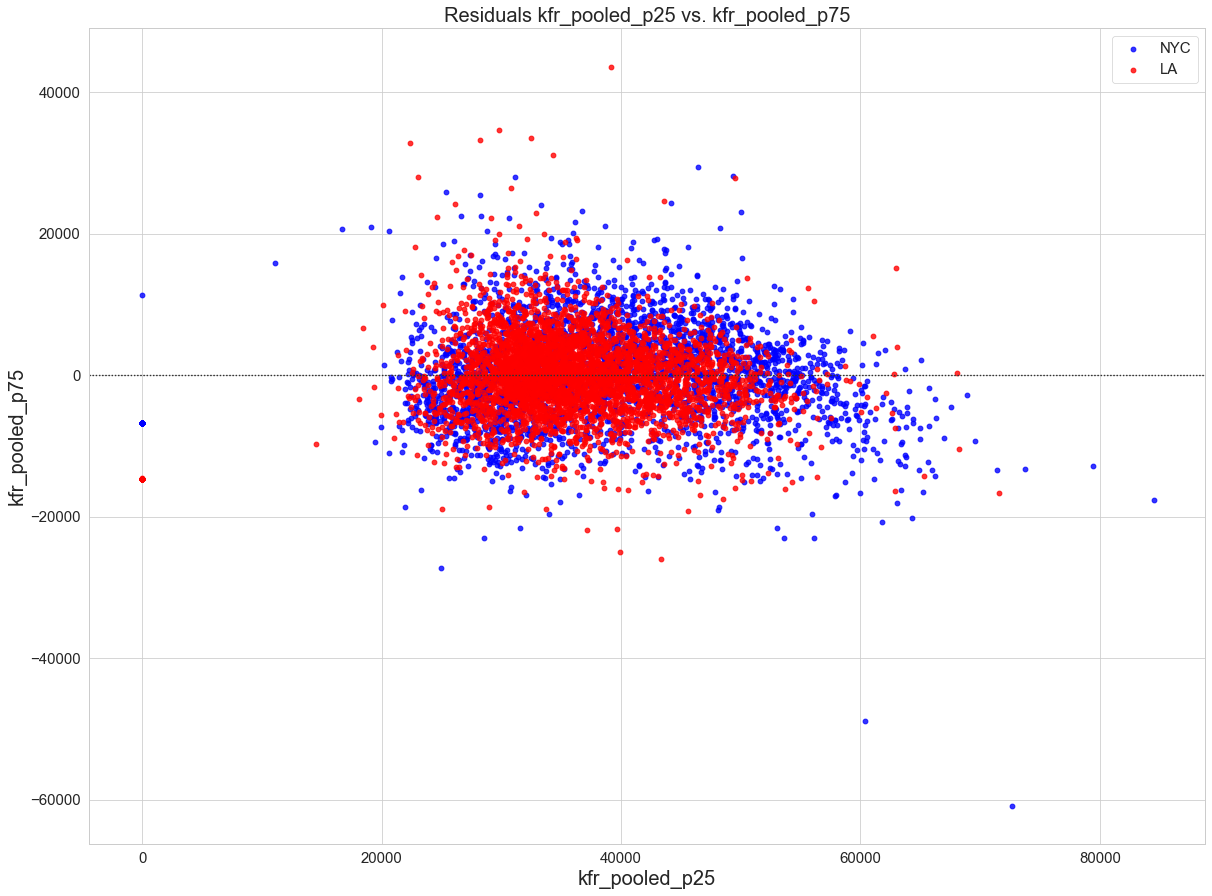

In [42]:
#Plotting residuals for kfr_pooled_p25 vs. kfr_pooled_p75
fig = plt.figure(figsize=(20,15))
sns.residplot(x=nyc_x,y=nyc_y,color='blue', label='NYC')
sns.residplot(x=la_x,y=la_y,color='red', label='LA')
plt.title('Residuals kfr_pooled_p25 vs. kfr_pooled_p75', fontsize=20)
plt.xlabel('kfr_pooled_p25',fontsize=20)
plt.ylabel('kfr_pooled_p75',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)